In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("clustered_data.csv")

In [3]:
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,class
0,0.171429,0.200000,0.150,0.586464,0.473200,0.285850,0.289376,0.72,0.014984,0.571429,0
1,0.492857,0.328571,0.090,0.384269,0.683551,0.512708,0.310438,0.20,0.024375,0.523810,0
2,0.742857,0.214286,0.115,0.536140,0.424722,0.541026,0.444709,1.00,0.041651,0.238095,0
3,0.285714,0.521429,0.075,0.297277,0.076711,0.336605,0.215347,0.36,0.020817,0.428571,0
4,0.642857,0.307143,0.200,0.437279,0.665572,0.467226,0.479354,0.92,0.004983,0.380952,0


In [4]:
data.tail()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,class
2194,0.228571,0.471429,0.400,0.338653,0.002124,0.450867,0.258147,0.28,0.062484,0.142857,3
2195,0.400000,0.442857,0.365,0.251042,0.028699,0.738794,0.206962,0.24,0.024984,0.142857,3
2196,0.664286,0.342857,0.165,0.519494,0.789233,0.554313,0.971688,0.20,0.010817,0.952381,3
2197,0.842857,0.250000,0.150,0.502863,0.516175,0.615119,0.364102,1.00,0.006233,0.238095,3
2198,0.128571,0.435714,0.085,0.489363,0.621683,0.442065,0.099462,0.48,0.019984,0.476190,3


In [5]:
data.shape

(2199, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2199 non-null   float64
 1   P_SOIL       2199 non-null   float64
 2   K_SOIL       2199 non-null   float64
 3   TEMPERATURE  2199 non-null   float64
 4   HUMIDITY     2199 non-null   float64
 5   ph           2199 non-null   float64
 6   RAINFALL     2199 non-null   float64
 7   STATE        2199 non-null   float64
 8   CROP_PRICE   2199 non-null   float64
 9   CROP         2199 non-null   float64
 10  class        2199 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 189.1 KB


In [7]:
data['class'].unique()

array([0, 1, 2, 3], dtype=int64)

- Poor
- Average
- Good
- Very Good

In [8]:
data['class'].value_counts()

0    1800
1     200
3     100
2      99
Name: class, dtype: int64

In [9]:
graph_values = dict(data['class'].value_counts())
graph_values

{0: 1800, 1: 200, 3: 100, 2: 99}

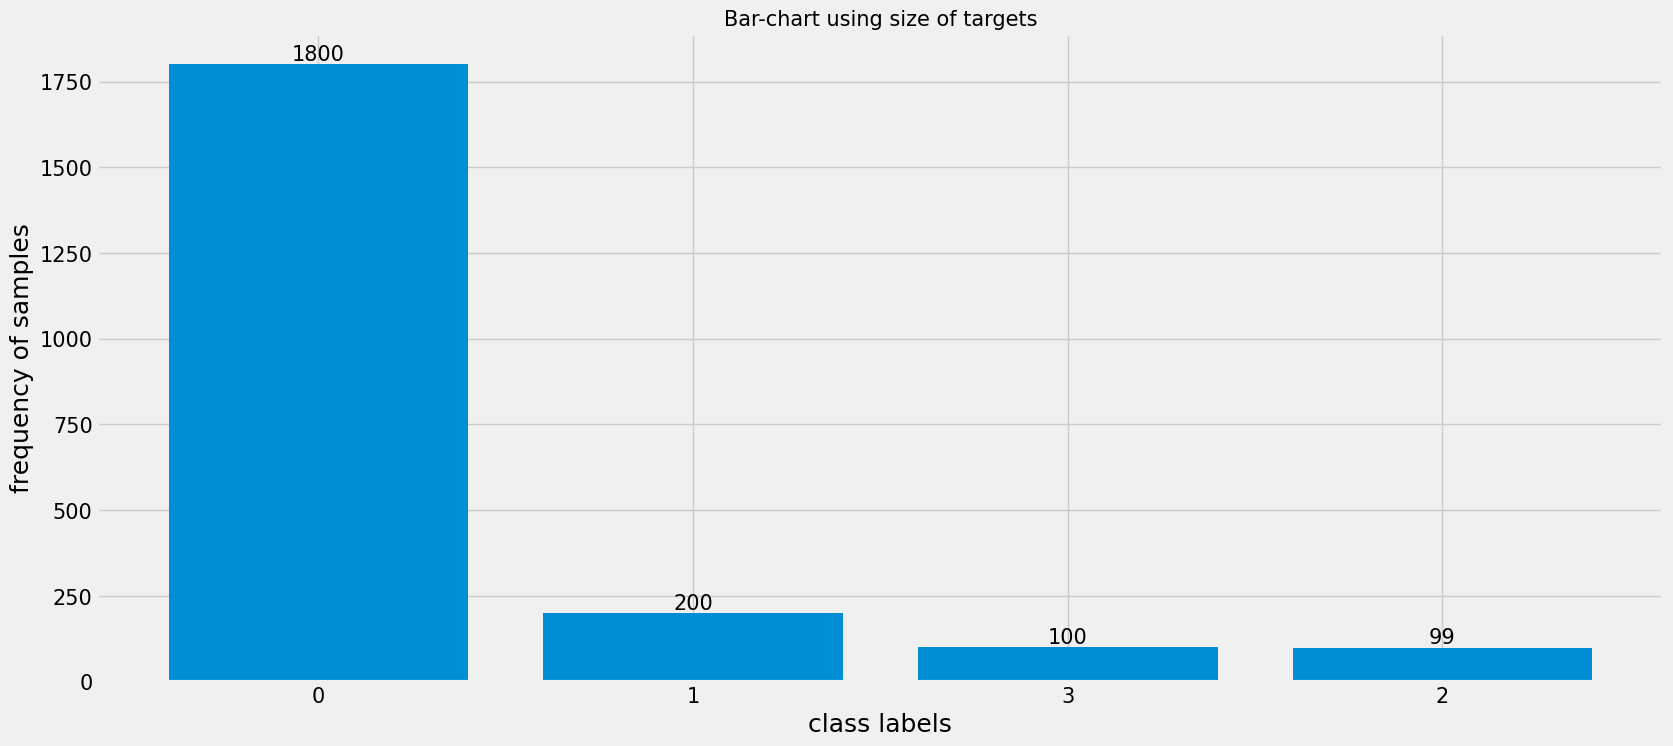

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(x=[str(label) for label in graph_values.keys()], height=graph_values.values())
    plt.title(label="Bar-chart using size of targets", fontsize=15)
    plt.xlabel(xlabel='class labels')
    plt.ylabel(ylabel='frequency of samples')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=15)
    
    plt.show()

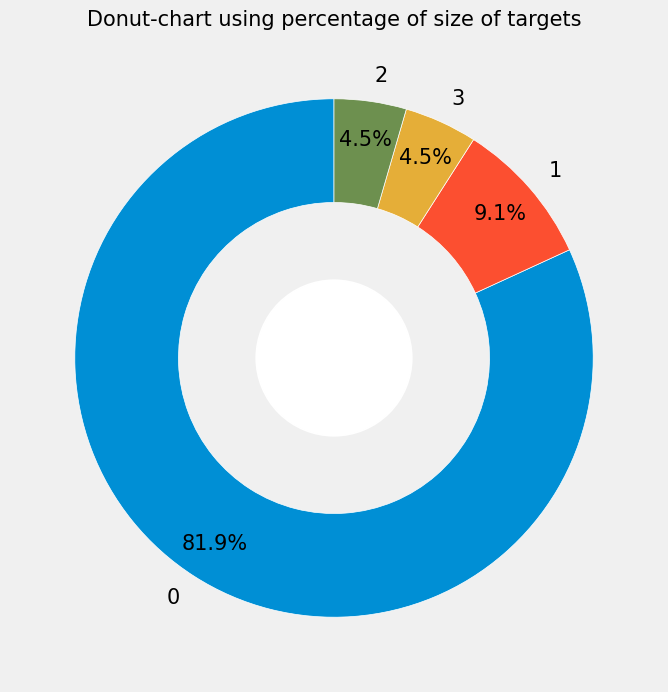

In [11]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8, 8))
    plt.rcParams['font.size'] = 15
    wedges, text, autotext = plt.pie(
        graph_values.values(),
        labels=graph_values.keys(),
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        pctdistance=.85
    )
    center_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(center_circle)
    plt.title(label="Donut-chart using percentage of size of targets", fontsize=15)
    plt.show()

In [12]:
X = data.drop('class', axis=1)
X.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0.171429,0.200000,0.150,0.586464,0.473200,0.285850,0.289376,0.72,0.014984,0.571429
1,0.492857,0.328571,0.090,0.384269,0.683551,0.512708,0.310438,0.20,0.024375,0.523810
2,0.742857,0.214286,0.115,0.536140,0.424722,0.541026,0.444709,1.00,0.041651,0.238095
3,0.285714,0.521429,0.075,0.297277,0.076711,0.336605,0.215347,0.36,0.020817,0.428571
4,0.642857,0.307143,0.200,0.437279,0.665572,0.467226,0.479354,0.92,0.004983,0.380952


In [13]:
y = data[['class']]
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [14]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)
data = pd.DataFrame(X_resampled, columns=X.columns)
data['class'] = y_resampled

In [15]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,class
0,0.040967,0.439494,0.053969,0.753103,0.216631,0.437511,0.487965,0.396472,0.018905,0.857143,3
1,0.371962,0.291711,0.064198,0.548221,0.738263,0.458559,0.140892,0.326418,0.027130,0.614108,3
2,0.450000,0.228571,0.190000,0.418720,0.826239,0.490986,0.594698,0.920000,0.033317,0.380952,0
3,0.185714,0.320847,0.091401,0.449607,0.521116,0.528489,0.141665,0.552007,0.008717,0.491432,2
4,0.407130,0.515154,0.065009,0.534336,0.600783,0.544062,0.154846,0.480000,0.000229,0.095238,2


In [16]:
data.shape

(7200, 11)

In [17]:
data['class'].unique()

array([3, 0, 2, 1], dtype=int64)

In [18]:
data['class'].value_counts()

3    1800
0    1800
2    1800
1    1800
Name: class, dtype: int64

In [19]:
graph_values = dict(data['class'].value_counts())
graph_values

{3: 1800, 0: 1800, 2: 1800, 1: 1800}

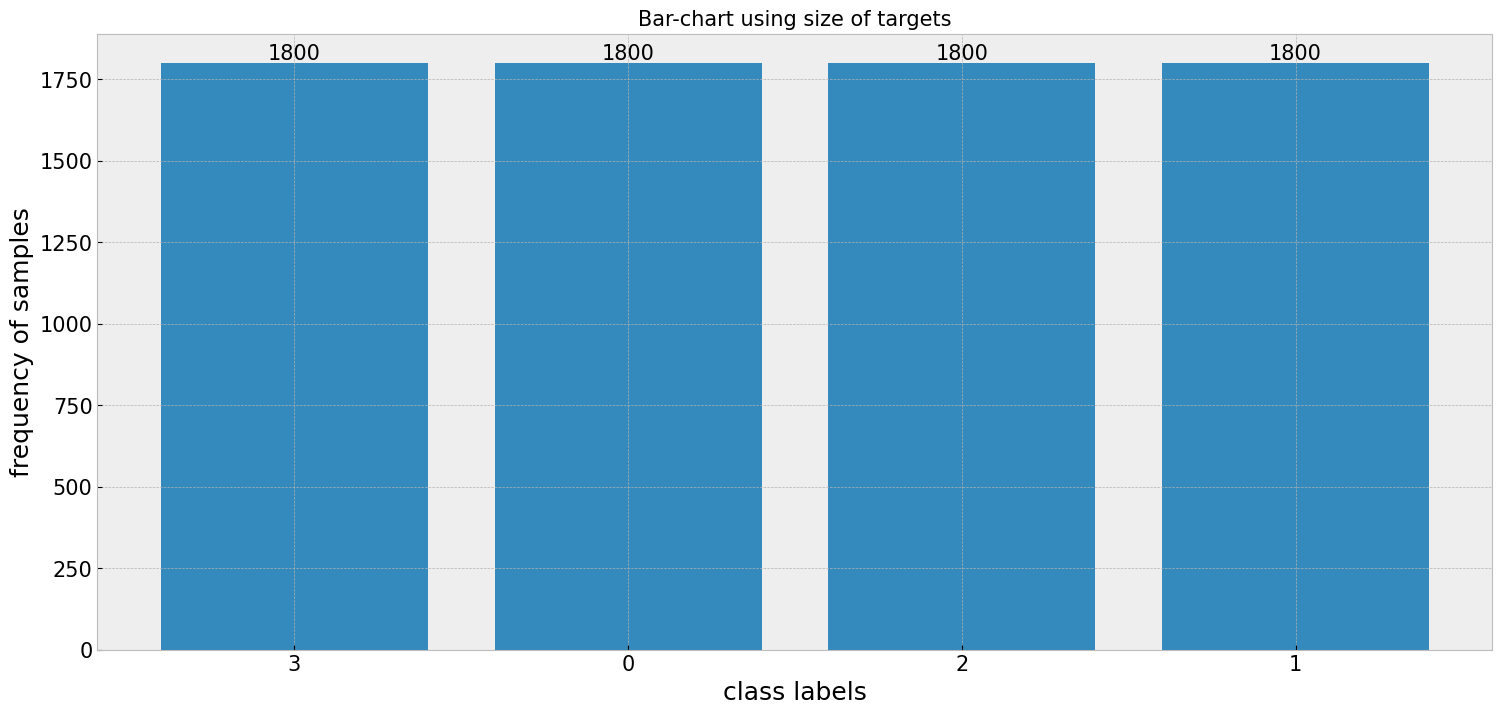

In [20]:
with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    bars = plt.bar(x=[str(label) for label in graph_values.keys()], height=graph_values.values())
    plt.title(label="Bar-chart using size of targets", fontsize=15)
    plt.xlabel(xlabel='class labels')
    plt.ylabel(ylabel='frequency of samples')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=15)
    
    plt.show()

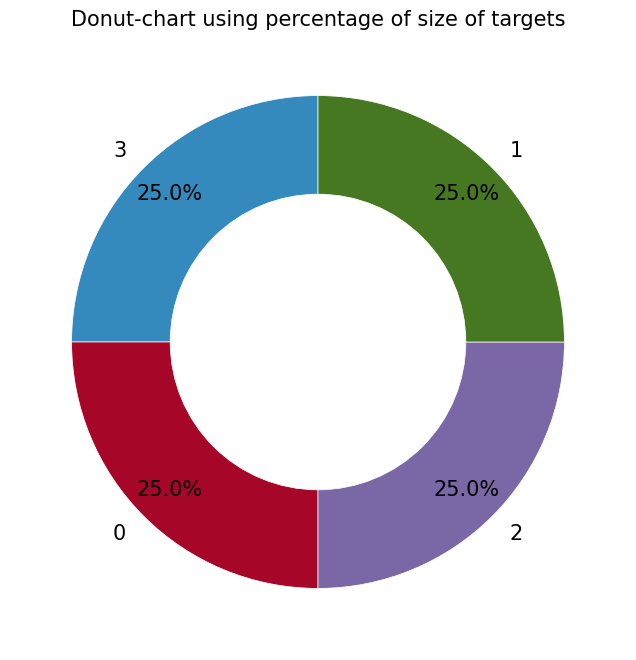

In [21]:
with plt.style.context(style="bmh"):
    plt.figure(figsize=(8, 8))
    plt.rcParams['font.size'] = 15
    wedges, text, autotext = plt.pie(
        graph_values.values(),
        labels=graph_values.keys(),
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        pctdistance=.85
    )
    center_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
    plt.gca().add_artist(center_circle)
    plt.title(label="Donut-chart using percentage of size of targets", fontsize=15)
    plt.show()

In [22]:
X = data.drop('class', axis=1)
X.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0.040967,0.439494,0.053969,0.753103,0.216631,0.437511,0.487965,0.396472,0.018905,0.857143
1,0.371962,0.291711,0.064198,0.548221,0.738263,0.458559,0.140892,0.326418,0.027130,0.614108
2,0.450000,0.228571,0.190000,0.418720,0.826239,0.490986,0.594698,0.920000,0.033317,0.380952
3,0.185714,0.320847,0.091401,0.449607,0.521116,0.528489,0.141665,0.552007,0.008717,0.491432
4,0.407130,0.515154,0.065009,0.534336,0.600783,0.544062,0.154846,0.480000,0.000229,0.095238


In [23]:
y = data[['class']]
y.head()

,class
0,3
1,3
2,0
3,2
4,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5760, 10) (1440, 10) (5760, 1) (1440, 1)


In [25]:
X_train.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
4748,0.542857,0.278571,0.060000,0.332603,0.563393,0.365562,0.161907,0.200000,0.050818,0.523810
5169,0.130077,0.058624,0.137709,0.527484,0.945602,0.382766,0.597620,0.920000,0.012102,0.190476
1219,0.292040,0.456816,0.384428,0.320239,0.028487,0.500883,0.176046,0.279084,0.023127,0.142857
2372,0.354234,0.421792,0.099236,0.577341,0.571988,0.505632,0.180080,0.480000,0.001926,0.095238
5973,0.566797,0.248312,0.160879,0.387883,0.793400,0.524427,0.684196,0.063515,0.029499,0.952381


In [26]:
y_train.head()

,class
4748,0
5169,1
1219,2
2372,2
5973,3


In [27]:
X_test.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
7148,0.740831,0.108255,0.111055,0.504541,0.574697,0.552189,0.610996,1.000000,0.015602,0.238095
2449,0.530736,0.319148,0.158893,0.502829,0.691580,0.567435,0.616682,1.000000,0.025349,0.380952
1263,0.087342,0.682097,0.748304,0.419808,0.909292,0.343870,0.381182,0.920000,0.010879,0.047150
4078,0.157143,0.357143,0.095000,0.566497,0.502174,0.801828,0.159221,0.400000,0.019150,0.619048
3227,0.095257,0.462962,0.067220,0.485957,0.632552,0.565024,0.072943,0.512587,0.072108,0.476190


In [28]:
y_test.head()

,class
7148,2
2449,3
1263,3
4078,0
3227,1


In [29]:
X_train.to_csv("train_test_data/X_train.csv", index=False)
y_train.to_csv("train_test_data/y_train.csv", index=False)
X_test.to_csv("train_test_data/X_test.csv", index=False)
y_test.to_csv("train_test_data/y_test.csv", index=False)

---